<a href="https://colab.research.google.com/github/alihehejrati/AI/blob/main/(T)%20linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [42]:
N = 20
X = np.random.random(N)*10 - 5 # N random scaler in [-5 5]
Y = .5 * X - 1 + np.random.randn(N)

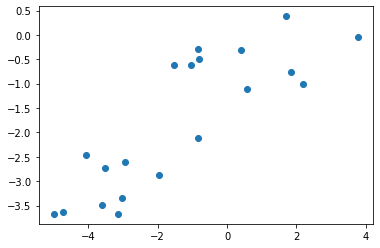

In [43]:
plt.scatter(X, Y);

In [44]:
model = nn.Linear(1, 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [45]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.001)

In [46]:
criterion

MSELoss()

In [47]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [48]:
X = X.reshape(N, 1);
Y = Y.reshape(N, 1);

inputs  = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [49]:
type(inputs)

torch.Tensor

In [50]:
n_epochs = 300
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()

  # forward
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())

  # backward
  loss.backward()
  optimizer.step()

  print(f'Epoch {it + 1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/300, Loss: 15.4728
Epoch 2/300, Loss: 15.0243
Epoch 3/300, Loss: 14.5897
Epoch 4/300, Loss: 14.1687
Epoch 5/300, Loss: 13.7607
Epoch 6/300, Loss: 13.3655
Epoch 7/300, Loss: 12.9826
Epoch 8/300, Loss: 12.6115
Epoch 9/300, Loss: 12.2521
Epoch 10/300, Loss: 11.9038
Epoch 11/300, Loss: 11.5664
Epoch 12/300, Loss: 11.2394
Epoch 13/300, Loss: 10.9226
Epoch 14/300, Loss: 10.6157
Epoch 15/300, Loss: 10.3183
Epoch 16/300, Loss: 10.0302
Epoch 17/300, Loss: 9.7510
Epoch 18/300, Loss: 9.4805
Epoch 19/300, Loss: 9.2184
Epoch 20/300, Loss: 8.9645
Epoch 21/300, Loss: 8.7184
Epoch 22/300, Loss: 8.4800
Epoch 23/300, Loss: 8.2490
Epoch 24/300, Loss: 8.0251
Epoch 25/300, Loss: 7.8082
Epoch 26/300, Loss: 7.5980
Epoch 27/300, Loss: 7.3944
Epoch 28/300, Loss: 7.1971
Epoch 29/300, Loss: 7.0059
Epoch 30/300, Loss: 6.8206
Epoch 31/300, Loss: 6.6411
Epoch 32/300, Loss: 6.4671
Epoch 33/300, Loss: 6.2985
Epoch 34/300, Loss: 6.1352
Epoch 35/300, Loss: 5.9769
Epoch 36/300, Loss: 5.8235
Epoch 37/300, Loss: 5

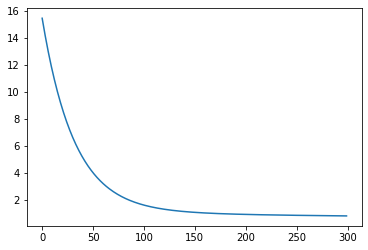

In [51]:
plt.plot(losses);

In [52]:
pred = model(inputs).detach().numpy()
pred.shape

(20, 1)

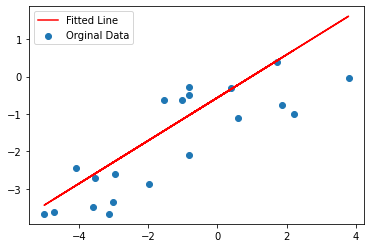

In [53]:
  plt.scatter(X, Y, label='Orginal Data');
  plt.plot(X, pred, 'r', label='Fitted Line');
  plt.legend();

In [64]:
W = model.weight.data.numpy()
b = model.bias.data.numpy()

print(W, b)

[[0.57518506]] [-0.5640408]
